# The OverFitters
#### BML project 2025/2026

*Authors:*

*Jahaciel Villaverde Nogues* (student nr.)

*Naresh de Bruijn* (7344783)

j.villaverdenogues@students.uu.nl

n.debruijn3@students.uu.nl

Last updated: November 14, 2025

## Import dependencies

In [2]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

from keras import layers, Input
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier



## Exploratory data analysis


EXPLORATORY DATA ANALYSIS


,Gene 1,Gene 2,Gene 3,Gene 4,Gene 5,Gene 6,Gene 7,Gene 8,Gene 9,Gene 10,...,Gene 1993,Gene 1994,Gene 1995,Gene 1996,Gene 1997,Gene 1998,Gene 1999,Gene 2000,Outcome,Id
count,3289.000000,3274.000000,3241.000000,3270.000000,3265.000000,3273.000000,3288.000000,3278.000000,3284.00000,3276.000000,...,3260.000000,3284.000000,3262.000000,3261.000000,3262.000000,3247.000000,3262.000000,3275.00000,3520.000000,3520.000000
mean,4.052904,107.755956,99.983956,14375.438838,365.189893,308.053773,403.015207,2644.823368,2389.36754,55.452686,...,122.137117,16846.558161,361.857756,125.662680,276.965665,78.797043,191.557940,244.18626,1.798864,2001.375852
std,1.129778,30.619004,28.069035,3771.949448,100.205347,70.017677,112.622076,639.304221,735.23174,16.484493,...,30.461217,3777.498096,92.166879,40.615151,78.566656,22.791368,55.121072,70.10917,1.116106,1155.501896
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,11.000000,263.000000,0.00000,0.000000,...,7.000000,4053.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,87.000000,81.000000,11706.250000,301.000000,259.000000,328.000000,2223.000000,1896.00000,44.000000,...,102.000000,14234.500000,298.000000,98.000000,225.000000,63.000000,155.000000,196.00000,1.000000,1003.250000
50%,4.000000,108.000000,100.000000,14295.500000,364.000000,308.000000,402.000000,2641.500000,2384.00000,56.000000,...,122.000000,16950.000000,360.000000,126.000000,276.000000,79.000000,192.000000,243.00000,2.000000,1999.500000
75%,5.000000,128.000000,118.000000,16923.750000,432.000000,356.000000,480.000000,3079.750000,2893.00000,67.000000,...,143.000000,19355.500000,425.000000,153.000000,330.000000,94.000000,228.750000,293.00000,3.000000,2999.500000
max,8.000000,214.000000,188.000000,30163.000000,702.000000,584.000000,744.000000,4756.000000,5026.00000,113.000000,...,221.000000,30625.000000,730.000000,284.000000,556.000000,161.000000,388.000000,494.00000,3.000000,3999.000000



MISSING DATA SUMMARY
Total missing values: 497848
Columns with missing values: 2000
Rows with any missing values: 3520 (100.0%)
Rows with all values missing: 0 (0.0%)
Rows with >50% values missing: 200 (5.7%)

Top 10 columns with most missing values:
           Missing_Count  Missing_Percentage
Gene 1511            290            8.238636
Gene 1797            289            8.210227
Gene 205             288            8.181818
Gene 775             286            8.125000
Gene 249             284            8.068182
Gene 984             283            8.039773
Gene 1474            283            8.039773
Gene 11              283            8.039773
Gene 1379            282            8.011364
Gene 1439            282            8.011364


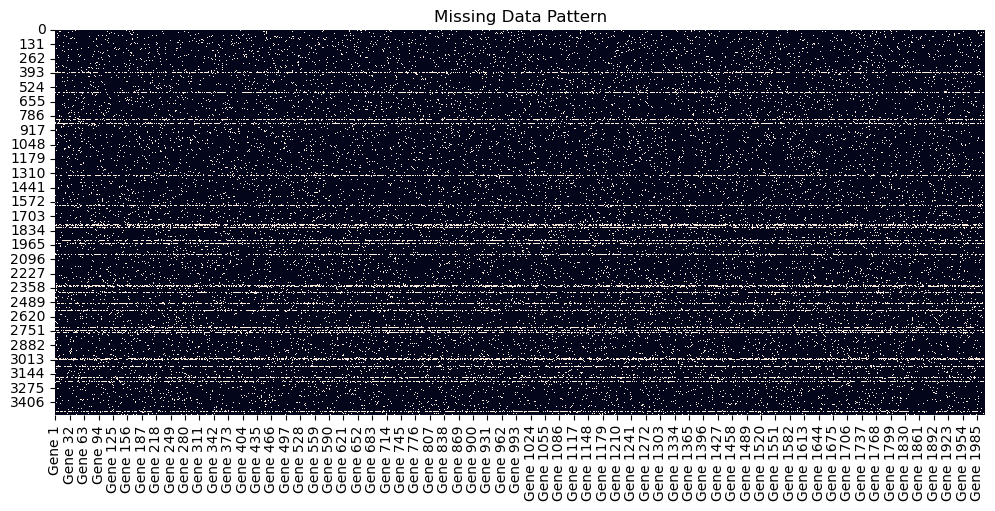


Class proportion
Absolute counts:
Outcome
3    1280
2     881
1     730
0     629
Name: count, dtype: int64

Proportions (%):
Outcome
3    36.363636
2    25.028409
1    20.738636
0    17.869318
Name: proportion, dtype: float64

CORRELATION ANALYSIS

Number of highly correlated feature pairs (|r| > 0.9): 59
Top 5 most correlated feature pairs:
Gene 4 - Gene 1323 (r = 1.000)
Gene 8 - Gene 1822 (r = 1.000)
Gene 32 - Gene 888 (r = 1.000)
Gene 39 - Gene 84 (r = 1.000)
Gene 39 - Gene 848 (r = 1.000)


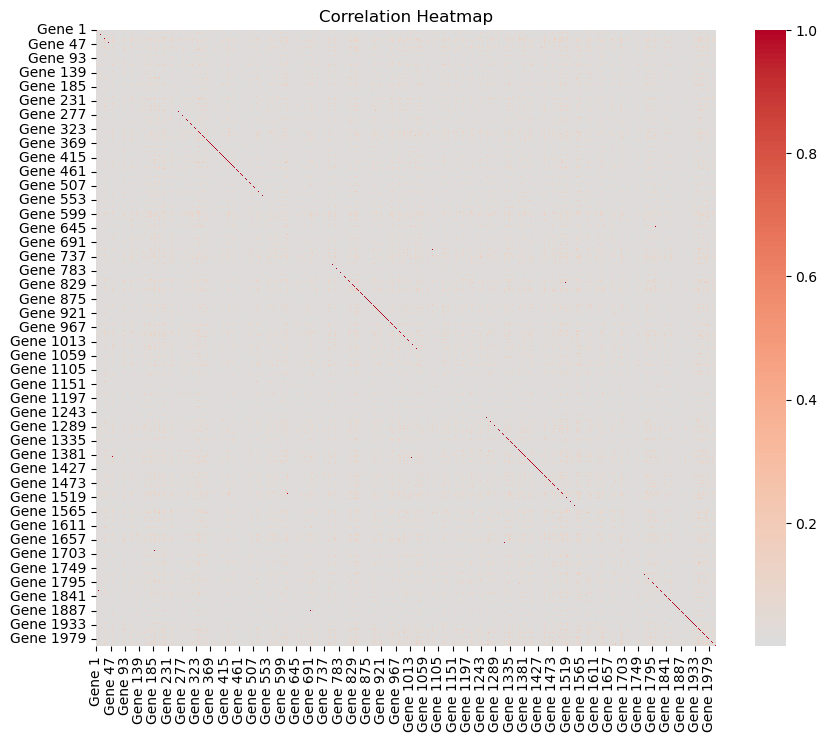


Min, Max, and Variance

VALUE RANGE AND VARIANCE
Maximum value in dataset: 51864.0
Minimum value in dataset: 0.0
Feature with highest variance: Gene 1127 (45090801.160)

Boxplot for top 30 most variable features


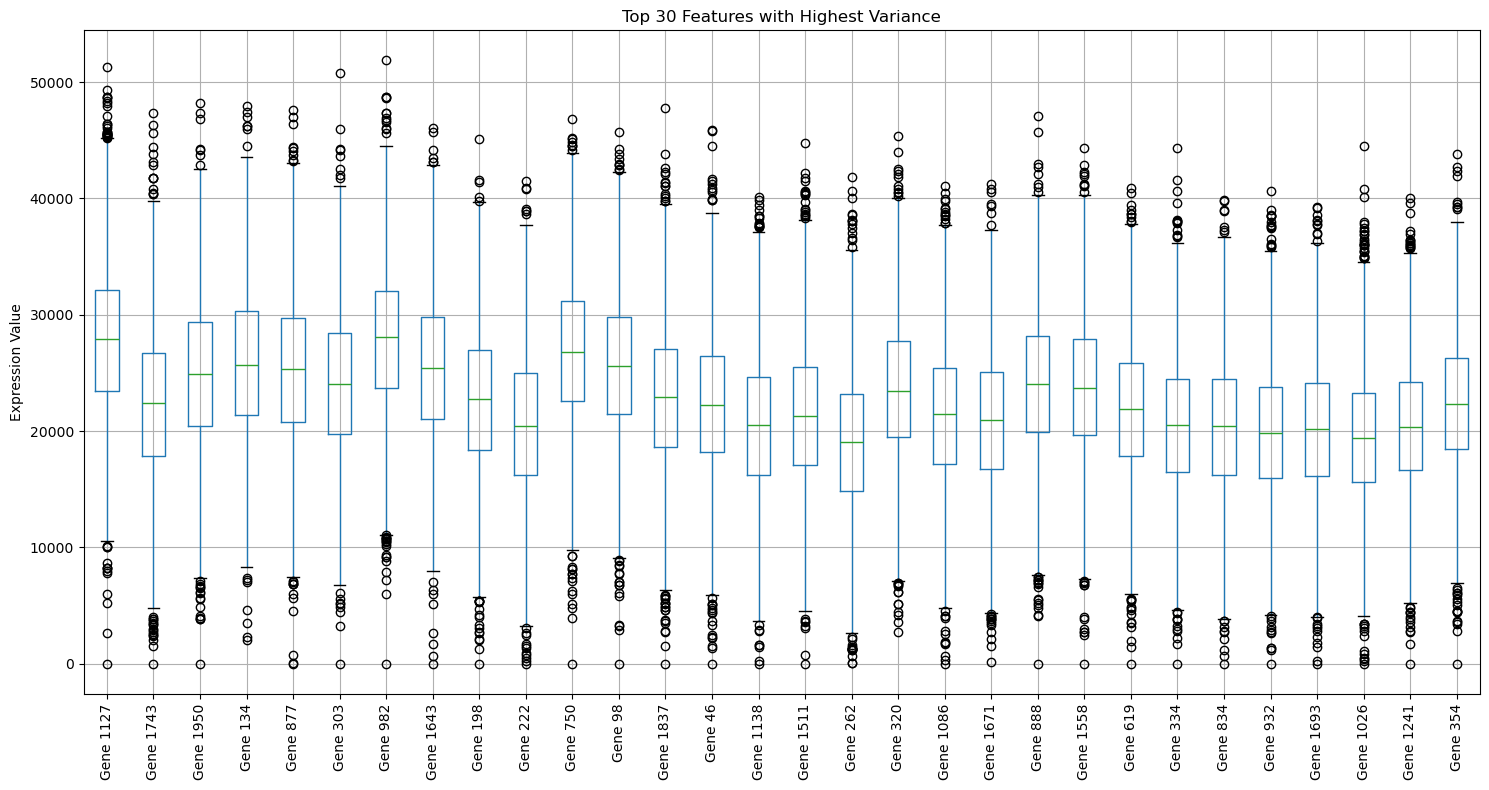


Exploraty Data Analysis SUMMARY
Dataset shape: (3520, 2002)
Total missing values: 497848
Highly correlated feature pairs (>0.9): 59
Value range: [0.0, 51864.0]
Feature with highest variance: Gene 1127


In [ ]:
# guided exercise 1:

# data exploratory
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Load in dataset
train_data = pd.read_csv('train_2025_2026.csv')

# display the data
display(pd.DataFrame(train_data).describe())

# Missing values summary
print("\n" + "="*50)
print("MISSING DATA SUMMARY")
print("="*50)

missing_by_column = train_data.isnull().sum()
columns_with_missing = missing_by_column[missing_by_column > 0]
rows_with_any_missing = train_data.isnull().any(axis=1).sum()
rows_with_all_missing = train_data.isnull().all(axis=1).sum()
rows_with_half_missing = (train_data.isnull().sum(axis=1) > train_data.shape[1] // 2).sum()

print(f"Total missing values: {train_data.isnull().sum().sum()}")
print(f"Columns with missing values: {len(columns_with_missing)}")
print(f"Rows with any missing values: {rows_with_any_missing} ({rows_with_any_missing / len(train_data) * 100:.1f}%)")
print(f"Rows with all values missing: {rows_with_all_missing} ({rows_with_all_missing / len(train_data) * 100:.1f}%)")
print(f"Rows with >50% values missing: {rows_with_half_missing} ({rows_with_half_missing / len(train_data) * 100:.1f}%)")

# top 10 columns with most missing values
missing_analysis = pd.DataFrame({
    'Missing_Count': train_data.isnull().sum(),
    'Missing_Percentage': (train_data.isnull().sum() / len(train_data)) * 100
}).sort_values('Missing_Count', ascending=False)

print("\nTop 10 columns with most missing values:")
print(missing_analysis.head(10))

# Visualise missing data pattern
plt.figure(figsize=(12, 5))
sns.heatmap(train_data.isnull(), cbar=False)
plt.title('Missing Data Pattern')
plt.show()

# class proportion
print("\n" + "="*50)
print("Class proportion")
print("="*50)

class_counts = train_data['Outcome'].value_counts()
class_proportions = train_data['Outcome'].value_counts(normalize=True) * 100

print("Absolute counts:")
print(class_counts)

print("\nProportions (%):")
print(class_proportions)


# Correlation analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

numeric_data = train_data.drop(columns=['Outcome'], errors='ignore')
corr_matrix = numeric_data.corr().abs()

# Identify highly correlated feature pairs
high_corr_pairs = np.where(np.triu(corr_matrix, 1) > 0.9)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
                      for x, y in zip(*high_corr_pairs)]
print(f"\nNumber of highly correlated feature pairs (|r| > 0.9): {len(high_corr_features)}")
if len(high_corr_features) > 0:
    print("Top 5 most correlated feature pairs:")
    for pair in high_corr_features[:5]:
        print(f"{pair[0]} - {pair[1]} (r = {pair[2]:.3f})")

# # correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
# plt.title('Correlation Heatmap')
# plt.show()

# Min, max, and variance
print("\n" + "="*50)
print("Min, Max, and Variance")
print("="*50)
max_value = numeric_data.max().max()
min_value = numeric_data.min().min()

# print max and min values of the training dataset
print(f"Maximum value in dataset: {max_value}")
print(f"Minimum value in dataset: {min_value}")


print("\n" + "="*50)
print("RANGE AND VARIANCE values")
print("="*50)

# Feature variance
feature_variances = numeric_data.var().sort_values(ascending=False)
highest_variance_feature = feature_variances.idxmax()
print(f"Feature with highest variance: {highest_variance_feature} ({feature_variances.iloc[0]:.3f})")

# Bloxplot 
print("\n" + "="*50)
print("Boxplot for top 30 most variable features")
print("="*50)

# Boxplot of top 30 features
top30_features = feature_variances.head(30).index
plt.figure(figsize=(15, 8))
numeric_data[top30_features].boxplot(rot=90)
plt.title('Top 30 Features with Highest Variance')
plt.ylabel('Expression Value')
plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*50)
print("Exploraty Data Analysis SUMMARY")
print("="*50)

print(f"Dataset shape: {train_data.shape}")
print(f"Total missing values: {train_data.isnull().sum().sum()}")
print(f"Highly correlated feature pairs (>0.9): {len(high_corr_features)}")
print(f"Value range: [{min_value}, {max_value}]")
print(f"Feature with highest variance: {highest_variance_feature}")



## Handelling imbalanced data

In [7]:
# Guided Exercise 2: Undersampling to balance classes
from sklearn.utils import resample
imbalanced_data = pd.read_csv('train_2025_2026.csv')

#check the count for every class
class_counts = imbalanced_data['Outcome'].value_counts()
print(class_counts)

#the class with the fewer counts
num_min = min(class_counts)
print('Number of samples of the class with fewer samples:', num_min)

# for each class we randomly select the number of samples of the class with less samples
balanced_list = []
for class_ in imbalanced_data['Outcome'].unique():
    df_class = imbalanced_data[imbalanced_data['Outcome'] == class_]
    df_resampled = resample(df_class, replace=False, n_samples=num_min, random_state=42)
    balanced_list.append(df_resampled)

# we create a dataframe with all the balanced clases and saved it in a csv
balanced_data = pd.concat(balanced_list)
print('New class distribution:\n', balanced_data['Outcome'].value_counts())
balanced_data.to_csv('training_balanced_data.csv', index=False)


Outcome
3    1280
2     881
1     730
0     629
Name: count, dtype: int64
Number of samples of the class with fewer samples: 629
New class distribution:
 Outcome
3    629
0    629
2    629
1    629
Name: count, dtype: int64


TODO:## Title for exercise 3? 

In [8]:
# Guided exercise 3:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
import pandas as pd

# load balanced data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

#split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#pipeline seting and training
model = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression(max_iter=1000, penalty = None))
model.fit(X_train, y_train)

# predicting and probability with the model the training and testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# calculate ROC AUC and macro F1 metrics
roc_train = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
roc_val = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_val = f1_score(y_test, y_test_pred, average='macro')

print(f"Training ROC AUC: {roc_train:.4f}")
print(f"Validation ROC AUC: {roc_val:.4f}")
print(f"Training Macro F1: {f1_train:.4f}")
print(f"Validation Macro F1: {f1_val:.4f}")

'''
Explanation of the metrics:

ROC AUC one-versus-rest basically performs a normal ROC AUC for binary classification, which basically compares the performance
of the model regarding true positive rate and false positive rate over all posible thresholds. But in this case, as we are in a
multiclasification task, this AUC will be the average of comparing each class against all other classes togheter as if they 
formed a new class all toghether.

Macro F1 is like a plain F1 in binary classification, where precission and recall are taken into acount and the average is done in a one-versus-rest 
as with the ROC AUC.
'''
'''
The impute and scaling of the data can't be done before the spliting of the training and validation data because then we would be imputing and
scaling taking into acount the average of all data including the one that will be used for testing, which will actually give information to the model
of the validation data and thus the generalisation poerformance accuracy will be compromised.
'''


Training ROC AUC: 1.0000
Validation ROC AUC: 0.9408
Training Macro F1: 1.0000
Validation Macro F1: 0.7940


"\nThe impute and scaling of the data can't be done before the spliting of the training and validation data because then we would be imputing and\nscaling taking into acount the average of all data including the one that will be used for testing, which will actually give information to the model\nof the validation data and thus the generalisation poerformance accuracy will be compromised.\n"

## Pipeline with KNN Imputer

In [9]:
# Guided exercise 4:
from sklearn.impute import KNNImputer

# make pipeline
model = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), LogisticRegression(penalty=None))

# train moldel
model.fit(X_train, y_train)

# predicting and probability with the model the training and testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# calculate ROC AUC and macro F1 metrics
roc_train = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
roc_val = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_val = f1_score(y_test, y_test_pred, average='macro')

print(f"Training ROC AUC: {roc_train:.4f}")
print(f"Validation ROC AUC: {roc_val:.4f}")
print(f"Training Macro F1: {f1_train:.4f}")
print(f"Validation Macro F1: {f1_val:.4f}")


'''
In this case, we first need to scale the data as the imputer algorithm uses euclidian distances to find the nearest neighbor in the data space,
taking into acount all the dimensions, and so it's necessary to scale the data so not one feature has more weight than another when 
computing which is the nearest neighbour.
'''

Training ROC AUC: 1.0000
Validation ROC AUC: 0.9478
Training Macro F1: 1.0000
Validation Macro F1: 0.8139


"\nIn this case, we first need to scale the data as the imputer algorithm uses euclidian distances to find the nearest neighbor in the data space,\ntaking into acount all the dimensions, and so it's necessary to scale the data so not one feature has more weight than another when \ncomputing which is the nearest neighbour.\n"

## L2 Regularization with Cross-Validation

In [10]:
# Guided exercise 5:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

# Load the data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

# Create both pipelines
modelreg = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), LogisticRegression(C = 1))
modelnoreg = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), LogisticRegression(penalty=None))

# Scoring metrics dictionary
scoring = {
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

#cross validation and trainings
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_resultsreg = cross_validate(modelreg, X, y, cv=cv, scoring=scoring)
cv_resultsnoreg = cross_validate(modelnoreg, X, y, cv=cv, scoring=scoring)

# metric calculations
roc_aucreg = np.mean(cv_resultsreg['test_roc_auc_ovr'])
f1_macroreg = np.mean(cv_resultsreg['test_f1_macro'])
roc_aucnoreg = np.mean(cv_resultsnoreg['test_roc_auc_ovr'])
f1_macronoreg = np.mean(cv_resultsnoreg['test_f1_macro'])


print(f"Average 10-fold ROC AUC (OvR) regularized model: {roc_aucreg:.4f}")
print(f"Average 10-fold F1 macro regularized model: {f1_macroreg:.4f}")
print(f"Average 10-fold ROC AUC (OvR) non regularized model: {roc_aucnoreg:.4f}")
print(f"Average 10-fold F1 macro non regularized model: {f1_macronoreg:.4f}")
print(f'ROC AUC difference Reg vs NonReg:{roc_aucreg-roc_aucnoreg:.4f}')
print(f'ROC AUC difference Reg vs NonReg:{f1_macroreg-f1_macronoreg:.4f}')


Average 10-fold ROC AUC (OvR) regularized model: 0.9427
Average 10-fold F1 macro regularized model: 0.7856
Average 10-fold ROC AUC (OvR) non regularized model: 0.9406
Average 10-fold F1 macro non regularized model: 0.7818
ROC AUC difference Reg vs NonReg:0.0021
ROC AUC difference Reg vs NonReg:0.0038


## PCA Analysis

The variance explained by the PC1 and PC2 in %: [0.67 0.63]
Top features for PC: 
 PC1      Gene 113
PC2     Gene 1478
PC3     Gene 1882
PC4     Gene 1049
PC5      Gene 639
PC6      Gene 385
PC7      Gene 120
PC8     Gene 1924
PC9     Gene 1268
PC10     Gene 213
dtype: object


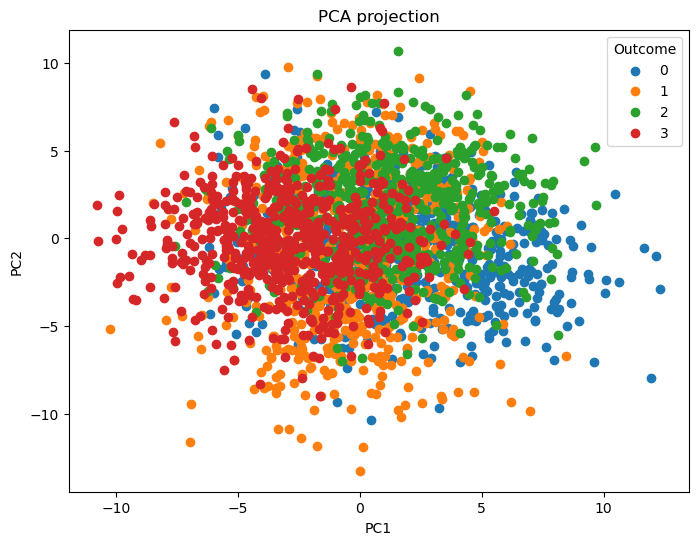

In [11]:
# Guided exercise 6:
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

#names of each feture
feature_names = X.columns.tolist()

#sacle and impute
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_scaled)

#pca transformation
pca = PCA()
X_pca = pca.fit_transform(X_imputed)

#explained variance
explain_2PC = pca.explained_variance_ratio_[:2]
print(f'The variance explained by the PC1 and PC2 in %: {(100* explain_2PC).round(2)}')

#dataframe with top features per PC:
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=feature_names)

#just top feature per PC
top_features = loadings.abs().idxmax()

print(f'Top features for PC: \n {top_features[:10]}')

#Plot
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=str(label))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection')
plt.legend(title = 'Outcome')  
plt.show()


## Dimentionality reduction

In [12]:
#Guided exercise 7:

#Load data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

#set pipeline
model = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), PCA(n_components=100), LogisticRegression(C = 1))

# scoring metrics
scoring = {
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# cross validation and training
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)

#metrics
roc_auc = np.mean(cv_results['test_roc_auc_ovr'])
f1_macro = np.mean(cv_results['test_f1_macro'])


print(f"Average 10-fold ROC AUC (OvR) PCA regularized model: {roc_auc:.4f}")
print(f"Average 10-fold F1 macro PCA regularized model: {f1_macro:.4f}")
print(f'ROC AUC improvement PCA vs NonPCA:{((roc_auc-0.9427)/0.9427*100):.4f}%')
print(f'ROC AUC improvement PCA vs NonPCA:{((f1_macro-0.7856)/0.7856*100):.4f}%')

Average 10-fold ROC AUC (OvR) PCA regularized model: 0.9491
Average 10-fold F1 macro PCA regularized model: 0.8021
ROC AUC improvement PCA vs NonPCA:0.6825%
ROC AUC improvement PCA vs NonPCA:2.1005%


## Nested Cross-Validation

In [13]:
# guided exercise 8:
from sklearn.model_selection import RandomizedSearchCV

data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

model = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), PCA(), LogisticRegression())


scoring = {
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

param_distributions = {
    'pca__n_components': [50, 100, 200, 500],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]
}

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=inner_cv,
    random_state=42,
    n_jobs=-2
)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_scores = cross_validate(
    random_search, X, y, cv=outer_cv, scoring=scoring, n_jobs=-2
)

# metric calculations
roc_aucreg = np.mean(nested_scores['test_roc_auc_ovr'])
f1_macroreg = np.mean(nested_scores['test_f1_macro'])

print('Metrics for best hyperparameters:')
print(f"Average 5-fold ROC AUC (OvR): {roc_aucreg:.4f}")
print(f"Average 5-fold F1 macro: {f1_macroreg:.4f}")


Metrics for best hyperparameters:
Average 5-fold ROC AUC (OvR): 0.9525
Average 5-fold F1 macro: 0.8098


## Random Forest

**Description Random Forest**

A Random Forest is a type of machine learning algorithm that builds many decision trees and combines their outputs to improve how well it can predict things and generalise. Each tree is trained on a bootstrap sample. This is a random subset of the training data selected with replacement. This means that every tree sees a different version of the dataset. This process is called bagging. It makes the trees more diverse and reduces the differences, helping to prevent overfitting. During the training of each tree, random feature subsampling is also applied at every split: instead of considering all features, only a random subset is evaluated for the best split. This makes the trees less similar to each other and stops one feature from standing out too much.
 
The algorithm determines the best splits for each decision tree by evaluating node purity using the Gini impurity measure. Gini impurity measures how mixed the classes are in a node. A lower value means a purer node. At each split, the algorithm chooses the feature and threshold that lead to the largest decrease in impurity. This effectively divides the data making the classes easier to separate. By combining the predictions of umerous decorrelated trees, typically due to majority voting for classification or averaging for regression, the Random Forest achieves high accuracy and robustness while automatically reducing overfitting bootstrapping and feature randomness.

Random Forest Cross-Validation Performance:
ROC AUC OvR: 0.9298 (+/- 0.0128)
F1 Macro: 0.7705 (+/- 0.0230)

Scores per fold:
Fold 1: F1 Macro = 0.7646, ROC AUC OvR = 0.9301
Fold 2: F1 Macro = 0.7900, ROC AUC OvR = 0.9361
Fold 3: F1 Macro = 0.7767, ROC AUC OvR = 0.9206
Fold 4: F1 Macro = 0.7712, ROC AUC OvR = 0.9352
Fold 5: F1 Macro = 0.7561, ROC AUC OvR = 0.9145
Fold 6: F1 Macro = 0.7612, ROC AUC OvR = 0.9405
Fold 7: F1 Macro = 0.7948, ROC AUC OvR = 0.9374
Fold 8: F1 Macro = 0.8105, ROC AUC OvR = 0.9523
Fold 9: F1 Macro = 0.7243, ROC AUC OvR = 0.9061
Fold 10: F1 Macro = 0.7558, ROC AUC OvR = 0.9254

Comparison with Regularised Logistic Regression:
RF ROC AUC OvR: 0.9298 vs LR ROC AUC OvR: 0.9525
RF F1 Macro: 0.7705 vs LR F1 Macro: 0.8098

Improvement with Random Forest:
ROC AUC OvR: -0.0227 (-2.4%)
F1 Macro: -0.0392 (-4.8%)

Top 5 most important features:
        feature  importance
380    Gene 381    0.003655
154    Gene 155    0.003393
1522  Gene 1523    0.003047
192    Gene 193    0

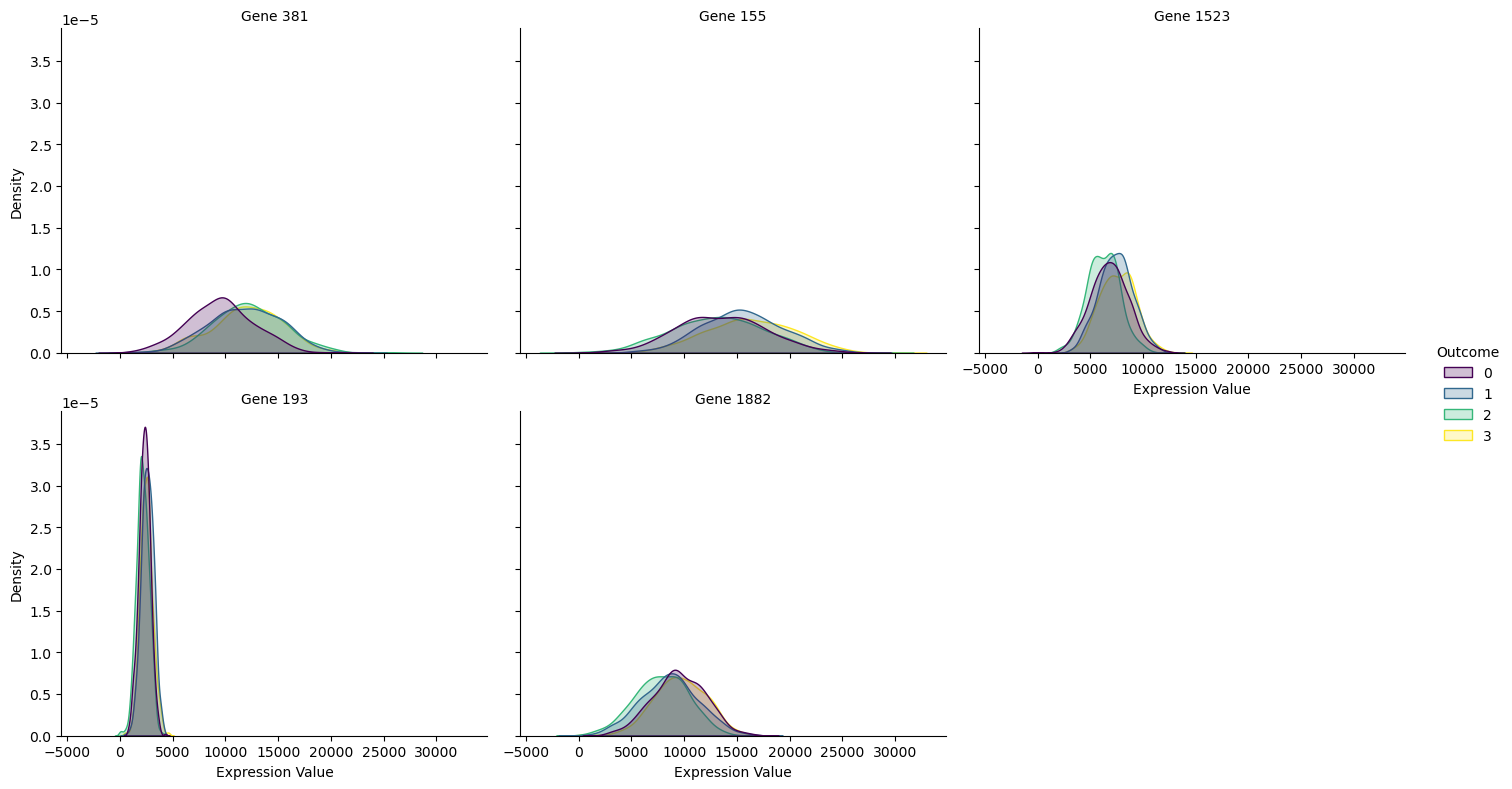


FINAL MODEL TRAINING AND PREDICTIONS

Final Test Set Performance:
Test ROC AUC OvR: 0.9379
Test F1 Macro: 0.7955
Predictions saved to 'rf_predictions.csv'

RANDOM FOREST FINAL SUMMARY
Cross-Validation ROC AUC OvR: 0.9298 (+/- 0.0128)
Cross-Validation F1 Macro: 0.7705 (+/- 0.0230)
Final Test ROC AUC OvR: 0.9379
Final Test F1 Macro: 0.7955

Improvement over Logistic Regression:
  - ROC AUC: -0.0227 (-2.4%)
  - F1 Macro: -0.0392 (-4.8%)

Top 5 Features:
  381. Gene 381: 0.0037
  155. Gene 155: 0.0034
  1523. Gene 1523: 0.0030
  193. Gene 193: 0.0030
  1882. Gene 1882: 0.0030


In [14]:
#Guided exercise 9:

# setup pipeline
rf_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors = 3)),
    ("scaler", StandardScaler()),
    # ("pca", PCA(n_components = 100)),
    ("classifier", RandomForestClassifier(
        n_estimators=250,
        n_jobs=-2,
        random_state=42
    ))
])

# Scoring metrics for RF
rf_scoring = {
    'rf_roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'rf_f1_macro': make_scorer(f1_score, average='macro')
}

# Perform cross-validation
rf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

rf_cv_scores = cross_validate(rf_pipeline, X_train, y_train, 
                             cv=rf_cv, 
                             scoring=rf_scoring)


# Calculate performance metrics
rf_auc_ovr = np.mean(rf_cv_scores['test_rf_roc_auc_ovr'])
rf_auc_std = np.std(rf_cv_scores['test_rf_roc_auc_ovr'])
rf_f1_macro = np.mean(rf_cv_scores['test_rf_f1_macro'])
rf_f1_std = np.std(rf_cv_scores['test_rf_f1_macro'])

# Random forest Cross Validation performance
print("Random Forest Cross-Validation Performance:")
print(f"ROC AUC OvR: {rf_auc_ovr:.4f} (+/- {rf_auc_std:.4f})")
print(f"F1 Macro: {rf_f1_macro:.4f} (+/- {rf_f1_std:.4f})")

# Scores per fold
print("\nScores per fold:")
for i, (f1, auc) in enumerate(zip(rf_cv_scores['test_rf_f1_macro'], rf_cv_scores['test_rf_roc_auc_ovr'])):
    print(f"Fold {i+1}: F1 Macro = {f1:.4f}, ROC AUC OvR = {auc:.4f}")


# Compare with previous regularised logistic regression results
print("\nComparison with Regularised Logistic Regression:")
print(f"RF ROC AUC OvR: {rf_auc_ovr:.4f} vs LR ROC AUC OvR: {roc_aucreg:.4f}")
print(f"RF F1 Macro: {rf_f1_macro:.4f} vs LR F1 Macro: {f1_macroreg:.4f}")


# Calculate improvement
auc_improvement = rf_auc_ovr - roc_aucreg
f1_improvement = rf_f1_macro - f1_macroreg

print(f"\nImprovement with Random Forest:")
print(f"ROC AUC OvR: {auc_improvement:+.4f} ({auc_improvement/roc_aucreg*100:+.1f}%)")
print(f"F1 Macro: {f1_improvement:+.4f} ({f1_improvement/f1_macroreg*100:+.1f}%)")

# Train final model on all training data
rf_pipeline.fit(X_train, y_train)

# Feature importance
rf_model = rf_pipeline.named_steps['classifier']
feature_importances = pd.DataFrame({
    'feature': balanced_data.columns[:-2],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 most important features:")
print(feature_importances.head(5))

# Plot distributions for top features
top_features = feature_importances.head(5)['feature'].values

# # Create individual distribution plots for each top feature
# for i, feature in enumerate(top_features):
#     # plt.figure(figsize=(10, 6))
#     sns.displot(data=balanced_data, x=feature, hue='Outcome', kind='kde', fill=True, 
#                 palette='viridis', height=6, aspect=1.2)
#     plt.title(f'Distribution of {feature} by Class', fontsize=14)
#     plt.xlabel(feature, fontsize=12)
#     plt.ylabel('Density', fontsize=12)
#     plt.show()

# Create a faceted grid with all top features
# Melt the dataframe to long format for seaborn
top_features_df = balanced_data[['Outcome'] + list(top_features)].copy()
top_features_melted = top_features_df.melt(id_vars=['Outcome'], 
                                          value_vars=top_features,
                                          var_name='Feature', 
                                          value_name='Expression_Value')

# Create faceted distribution plot
g = sns.displot(data=top_features_melted, x='Expression_Value', hue='Outcome', 
                col='Feature', col_wrap=3, kind='kde', fill=True, 
                palette='viridis', height=4, aspect=1.2)
g.set_titles("{col_name}")
g.set_axis_labels("Expression Value", "Density")
plt.show()



print("\n" + "="*50)
print("FINAL MODEL TRAINING AND PREDICTIONS")
print("="*50)

# Train final model on ALL training data (already done above, but being explicit)
# rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_pipeline.predict(X_test)
y_test_prob = rf_pipeline.predict_proba(X_test)

# Calculate final test performance
test_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"\nFinal Test Set Performance:")
print(f"Test ROC AUC OvR: {test_auc:.4f}")
print(f"Test F1 Macro: {test_f1:.4f}")

# Prepare predictions for submission

submission = pd.DataFrame({
    'id': X_test.index if hasattr(X_test, 'index') else range(len(y_test_pred)),
    'prediction': y_test_pred,
    # Add probability for the predicted class
    'probability': y_test_prob.max(axis=1)
})

# Add probabilities for each class
for i in range(y_test_prob.shape[1]):
    submission[f'prob_class_{i}'] = y_test_prob[:, i]

# Save to CSV
submission_file = 'rf_predictions.csv'
submission.to_csv(submission_file, index=False)
print(f"Predictions saved to '{submission_file}'")

# Final summary report
print("\n" + "="*50)
print("RANDOM FOREST FINAL SUMMARY")
print("="*50)

print(f"Cross-Validation ROC AUC OvR: {rf_auc_ovr:.4f} (+/- {rf_auc_std:.4f})")
print(f"Cross-Validation F1 Macro: {rf_f1_macro:.4f} (+/- {rf_f1_std:.4f})")
print(f"Final Test ROC AUC OvR: {test_auc:.4f}")
print(f"Final Test F1 Macro: {test_f1:.4f}")
print(f"\nImprovement over Logistic Regression:")
print(f"  - ROC AUC: {auc_improvement:+.4f} ({auc_improvement/roc_aucreg*100:+.1f}%)")
print(f"  - F1 Macro: {f1_improvement:+.4f} ({f1_improvement/f1_macroreg*100:+.1f}%)")
print(f"\nTop 5 Features:")
for i, row in feature_importances.head(5).iterrows():
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")




## Forward Neural Network with ReLU

In [15]:
# Guided exercise 10:
from keras import layers, Input
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier


#load data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']
y = y.astype(int)
input_shape = X.shape[1]
class_num = y.nunique()

# we had to create our own function as we were having an errror of KerasClassifier thinking 
# the pipeline was a regressor (not a classifier) and not accepting the prediction of probabilities for roc_auc.
def roc_auc_ovr_scorer(estimator, X, y):
    # predict probabilities from pipeline
    y_proba = estimator.predict_proba(X)
    return roc_auc_score(y, y_proba, multi_class='ovr')


# build keras NN model
def build_model(hiddenLayerOne=30, hiddenLayerTwo=20, hiddenLayerThree=10):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(hiddenLayerOne, activation='relu'), 
        Dense(hiddenLayerTwo, activation='relu'),
        Dense(hiddenLayerThree, activation='relu'),
        Dense(4, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# pass the keras NN to a scikit learn classifier object
clf = KerasClassifier(
    model=build_model,
    epochs=10,
    batch_size=32,
    verbose=0 
)

pipeNN = make_pipeline(SimpleImputer(strategy="constant", fill_value=-1), StandardScaler(), clf)

# scoring metrics
scoring = {
    'roc_auc_ovr': roc_auc_ovr_scorer,
    'f1_macro': make_scorer(f1_score, average='macro')
}

# cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(pipeNN, X, y, cv=cv, scoring=scoring)

roc_auc = np.mean(cv_results['test_roc_auc_ovr'])
f1_macro = np.mean(cv_results['test_f1_macro'])


print(f"Average 10-fold ROC AUC (OvR) NN: {roc_auc:.4f}")
print(f"Average 10-fold F1 macro NN: {f1_macro:.4f}")



Average 10-fold ROC AUC (OvR) NN: 0.9242
Average 10-fold F1 macro NN: 0.7456


XGBoost

In [3]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold


data = pd.read_csv('train_2025_2026.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3, metric='nan_euclidean')),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('pca', IncrementalPCA()),
    ('xgb', XGBClassifier(
        use_label_encoder=False,                          
        eval_metric='mlogloss',
        random_state=42,
        tree_method = 'hist',
        max_bin = 128
    ))
])

scoring = {
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

param_grid = {
    'pca__n_components': [50, 200, 500, 1000],
    'xgb__n_estimators': [200, 500],
    'xgb__max_depth': [3, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.6, 1.0],
    'xgb__colsample_bytree': [0.6, 1.0]
}


inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    cv=inner_cv, 
    n_jobs=1
)

# 4️⃣ Set up outer CV to evaluate generalization
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 5️⃣ Perform nested CV
nested_scores = cross_validate(
    grid_search, X, y, cv=outer_cv, scoring=scoring, n_jobs=-2
)

roc_aucreg = np.mean(nested_scores['test_roc_auc_ovr'])
f1_macroreg = np.mean(nested_scores['test_f1_macro'])

print('Metrics for best hyperparameters:')
print(f"Average 5-fold ROC AUC (OvR): {roc_aucreg:.4f}")
print(f"Average 5-fold F1 macro: {f1_macroreg:.4f}")

Metrics for best hyperparameters:
Average 5-fold ROC AUC (OvR): 0.9524
Average 5-fold F1 macro: 0.7936
